**TASK - 4 (SPAM SMS DETECTION)**

Build an AI model that can classify SMS messages as spam or
legitimate. Use techniques like TF-IDF or word embeddings with
classifiers like Naive Bayes, Logistic Regression, or Support Vector

#**Loading dataset**



In [ ]:
!pip install wordcloud -q
import pandas as pd
import numpy as np

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re  # for pattern matching and text manipulation.
import string
import nltk
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer as CV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/csv/Spam SMS detection/spam.csv", encoding='latin1')

#**Exploring dataset**

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


#**Data Cleaning**


In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)

**Label encoding** is a technique used in machine learning to convert categorical data into numerical format. It assigns a unique integer value to each category in the feature.

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['target'] = encoder.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
df.duplicated().sum()  #count duplicated rows

403

In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

#**Exploratory Data Analysis**

In [ ]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

Imbalanced dataset

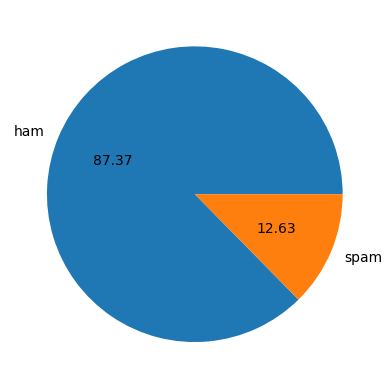

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

##**Tokenisation**

In [ ]:
import nltk
nltk.download('punkt',quiet=True)

True

In [ ]:
df['characters'] = df['text'].apply(len)

In [ ]:
df['words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df['sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,target,text,characters,words,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['characters','words','sentences']].describe()

,characters,words,sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#for ham messages
df[df['target'] == 0][['characters','words','sentences']].describe()

,characters,words,sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#for spam messages
df[df['target'] == 1][['characters','words','sentences']].describe()

,characters,words,sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='characters', ylabel='Count'>

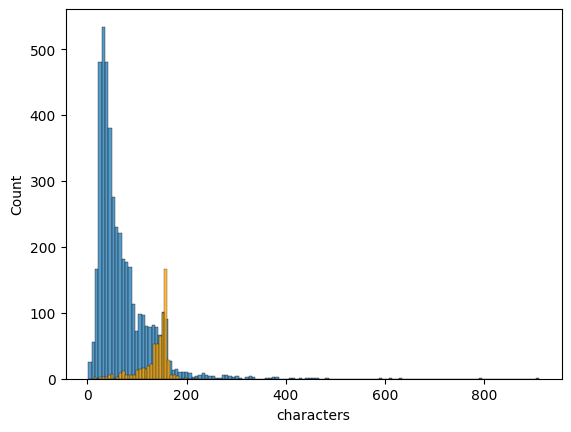

In [ ]:
sns.histplot(df[df['target'] == 0]['characters'])
sns.histplot(df[df['target'] == 1]['characters'],color='orange')

<Axes: xlabel='words', ylabel='Count'>

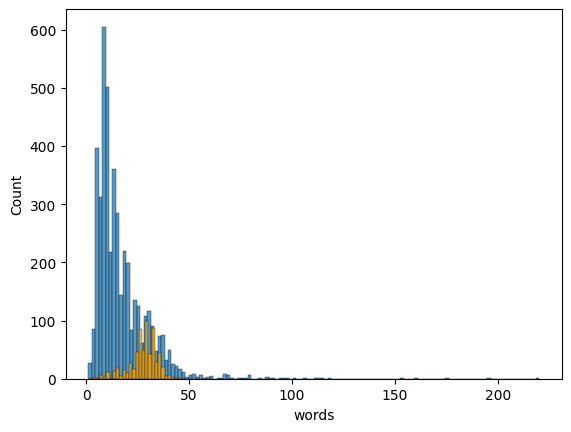

In [ ]:
sns.histplot(df[df['target'] == 0]['words'])
sns.histplot(df[df['target'] == 1]['words'],color='orange')

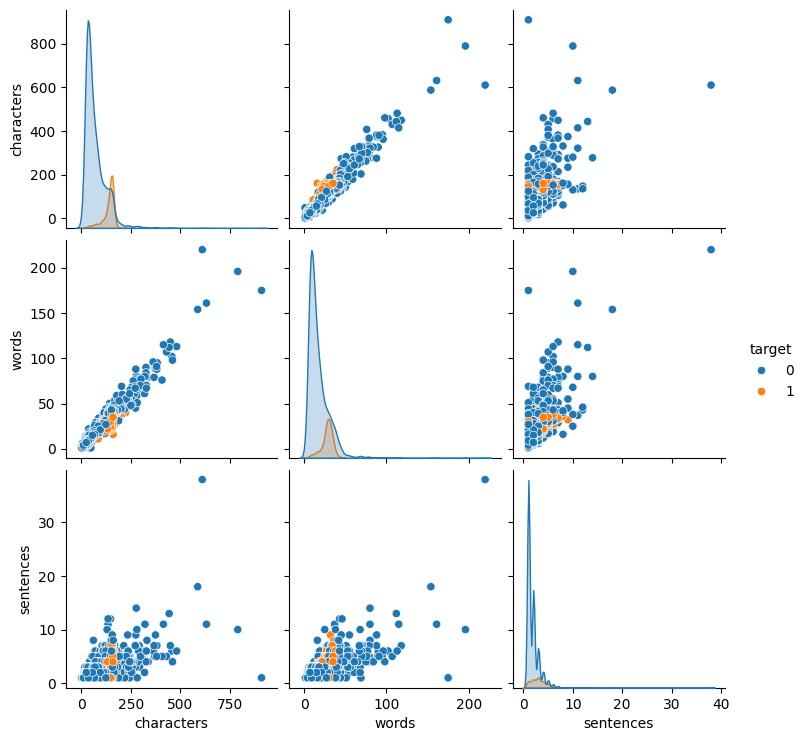

In [ ]:
sns.pairplot(df,hue='target')

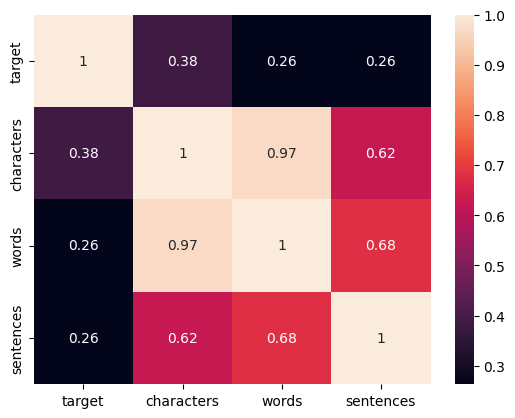

In [ ]:
numeric_df = df.select_dtypes(include=['float64','int32','int64'])
# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

#heatmap
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

#**Data Preprocessing**

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import string
string.punctuation

from nltk.corpus import stopwords
english_stopwords = stopwords.words('english')

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

###**Apply the above methods**

In [ ]:
def transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():#removing non alpha-numeric characters
            y.append(i)

    text = y[:] # y copied to text then clear list y.
    y.clear()

    for i in text:#removing stopwords and punctuations
      if i not in english_stopwords and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))#stemming

    return " ".join(y)#return as single string


In [ ]:
df['transformed_text'] = df['text'].apply(transform)

In [ ]:
df.head()

,target,text,characters,words,sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))     # for spam

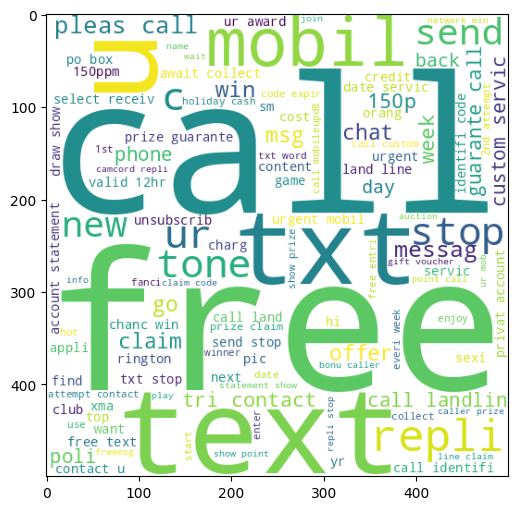

In [ ]:
#frequenlty occuring words in spam
plt.figure(figsize=(13,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))#for ham

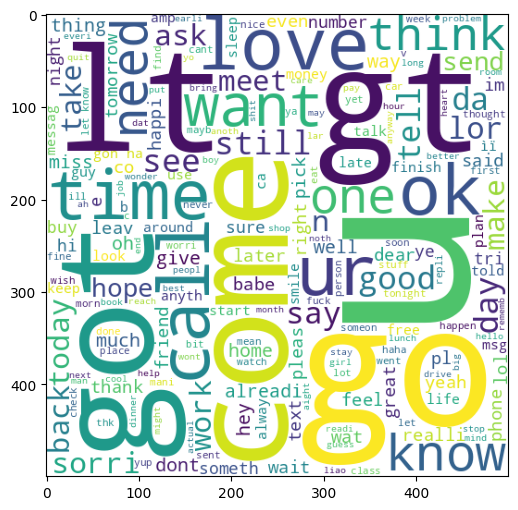

In [ ]:
#frequenlty occuring words in ham
plt.figure(figsize=(13,6))
plt.imshow(ham_wc)

In [ ]:
spam_corpus = []
for message in df[df['target'] == 1]['transformed_text'].tolist():
    for word in message.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9939

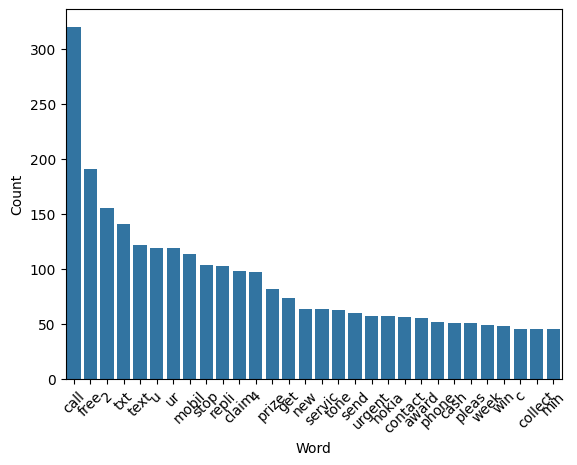

In [ ]:
from collections import Counter
word_counter = Counter(spam_corpus)

# Convert Counter data to a DataFrame
word_counts_df = pd.DataFrame(word_counter.most_common(30), columns=['Word', 'Count'])

# Barplot
sns.barplot(x='Word', y='Count', data=word_counts_df)

plt.xticks(rotation=45)
plt.show()

In [ ]:
ham_corpus = []
for message in df[df['target'] == 0]['transformed_text'].tolist():
    for word in message.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35404

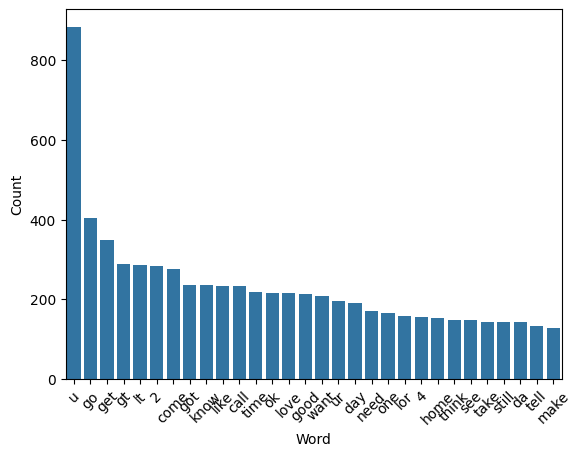

In [ ]:
word_counter2 = Counter(ham_corpus)

# Convert Counter data to a DataFrame
word_counts_df2 = pd.DataFrame(word_counter2.most_common(30), columns=['Word', 'Count'])

#Barplot
sns.barplot(x='Word', y='Count', data=word_counts_df2)

plt.xticks(rotation=45)
plt.show()

#**Model Building**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape

(5169, 3000)

In [ ]:
y = df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

##**a) Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

mnb = MultinomialNB()

In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred2))
naive_accuracy = accuracy_score(y_test, y_pred2)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))

print("Precision Score:", precision_score(y_test, y_pred2))

Accuracy Score: 0.9709864603481625
Confusion Matrix:
 [[896   0]
 [ 30 108]]
Precision Score: 1.0


##**b)Logistic Regression**

In [ ]:
LR_model = LogisticRegression()
LR_model.fit(X_train,y_train)
y_pred2 = LR_model.predict(X_test)

In [ ]:
print("Accuracy Score:", accuracy_score(y_test, y_pred2))
LR_model_accuracy = accuracy_score(y_test, y_pred2)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))

print("Precision Score:", precision_score(y_test, y_pred2))

Accuracy Score: 0.9564796905222437
Confusion Matrix:
 [[894   2]
 [ 43  95]]
Precision Score: 0.979381443298969


##**c)Support Vector Machine** **bold text**

In [ ]:
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
svm_model.fit(X_train,y_train)
predict = svm_model.predict(X_test)

In [ ]:
print("Accuracy Score:", accuracy_score(y_test, y_pred2))
svm_model_accuracy = accuracy_score(y_test, y_pred2)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))

print("Precision Score:", precision_score(y_test, y_pred2))

Accuracy Score: 0.9564796905222437
Confusion Matrix:
 [[894   2]
 [ 43  95]]
Precision Score: 0.979381443298969


#**Comparing all the accuracy score**

In [ ]:
columns=['MultinomialNB','LogisticRegression','SVC']
accuracy= [naive_accuracy,LR_model_accuracy, svm_model_accuracy]

FinalResult=pd.DataFrame({'Algorithm':columns, 'Accuracy':accuracy})

FinalResult

,Algorithm,Accuracy
0,MultinomialNB,0.970986
1,LogisticRegression,0.956480
2,SVC,0.956480


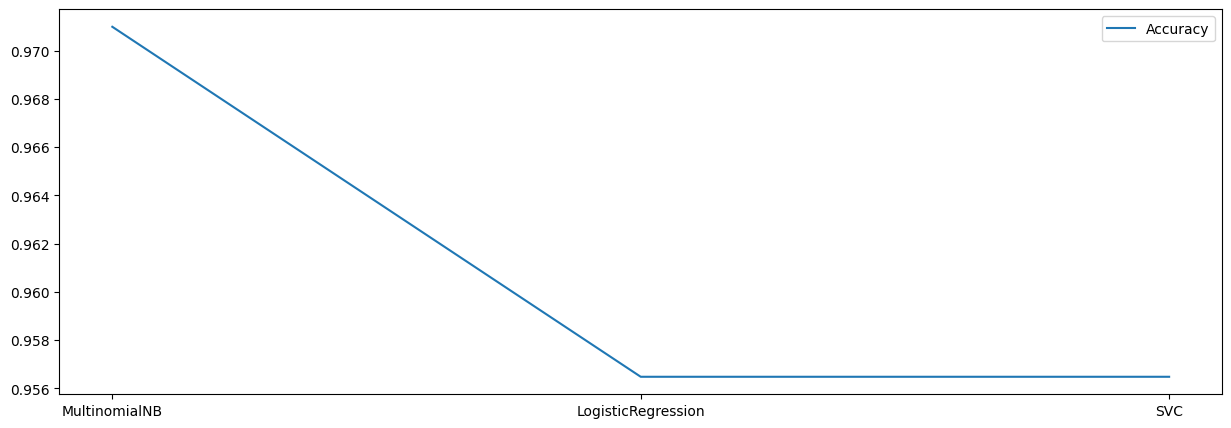

In [ ]:
fig,ax=plt.subplots(figsize=(15,5))
plt.plot(FinalResult.Algorithm,accuracy,label="Accuracy")
plt.legend()
plt.show()